**Author:** [Riccardo Guidotti](http://kdd.isti.cnr.it/people/riccardo-guidotti)  
**Python version:**  3.x

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

# Data Preparation

In [2]:
class_name = 'churn'
df = pd.read_csv('churn.csv', skipinitialspace=True, na_values='?', keep_default_na=True)

columns2remove = ['phone number']
df.drop(columns2remove, inplace=True, axis=1)
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
import sys
sys.path.append('./')

In [4]:
from data_preparation import prepare_dataset

In [5]:
res = prepare_dataset(df, class_name)
df, feature_names, class_values, numeric_columns, rdf, real_feature_names, features_map = res
df.head()

/Users/riccardo/Google Drive/DataMining2/Notebook/data_preparation.py:40: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  df = pd.concat([dfX, dfY], axis=1, join_axes=[dfX.index])


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state=VT,state=WA,state=WI,state=WV,state=WY,international plan=no,international plan=yes,voice mail plan=no,voice mail plan=yes,churn
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,1,0,0,1,0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,1,0,0,1,0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,1,0,1,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,0,1,1,0,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,0,1,1,0,0


# Data Partitioning

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [7]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [51]:
X_train.shape

(2333, 71)

In [52]:
np.sqrt(71)

8.426149773176359

# Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import pickle
pickle.dump(clf, 'filename.pickle')
clf = pickle.load('filename.pickle')

In [9]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.946
F1-score [0.96924829 0.77868852]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       855
           1       0.96      0.66      0.78       145

    accuracy                           0.95      1000
   macro avg       0.95      0.83      0.87      1000
weighted avg       0.95      0.95      0.94      1000



In [47]:
classification_report(y_test, y_pred, output_dict=True)

{'0': {'precision': 0.9392935982339956,
  'recall': 0.9953216374269006,
  'f1-score': 0.9664963089153891,
  'support': 855},
 '1': {'precision': 0.9574468085106383,
  'recall': 0.6206896551724138,
  'f1-score': 0.7531380753138076,
  'support': 145},
 'accuracy': 0.941,
 'macro avg': {'precision': 0.9483702033723169,
  'recall': 0.8080056462996572,
  'f1-score': 0.8598171921145983,
  'support': 1000},
 'weighted avg': {'precision': 0.9419258137241088,
  'recall': 0.941,
  'f1-score': 0.9355593650431597,
  'support': 1000}}

In [49]:
import json
json.dumps(classification_report(y_test, y_pred, output_dict=True))

'{"0": {"precision": 0.9392935982339956, "recall": 0.9953216374269006, "f1-score": 0.9664963089153891, "support": 855}, "1": {"precision": 0.9574468085106383, "recall": 0.6206896551724138, "f1-score": 0.7531380753138076, "support": 145}, "accuracy": 0.941, "macro avg": {"precision": 0.9483702033723169, "recall": 0.8080056462996572, "f1-score": 0.8598171921145983, "support": 1000}, "weighted avg": {"precision": 0.9419258137241088, "recall": 0.941, "f1-score": 0.9355593650431597, "support": 1000}}'

In [50]:
json.loads(json.dumps(classification_report(y_test, y_pred, output_dict=True)))

{'0': {'precision': 0.9392935982339956,
  'recall': 0.9953216374269006,
  'f1-score': 0.9664963089153891,
  'support': 855},
 '1': {'precision': 0.9574468085106383,
  'recall': 0.6206896551724138,
  'f1-score': 0.7531380753138076,
  'support': 145},
 'accuracy': 0.941,
 'macro avg': {'precision': 0.9483702033723169,
  'recall': 0.8080056462996572,
  'f1-score': 0.8598171921145983,
  'support': 1000},
 'weighted avg': {'precision': 0.9419258137241088,
  'recall': 0.941,
  'f1-score': 0.9355593650431597,
  'support': 1000}}

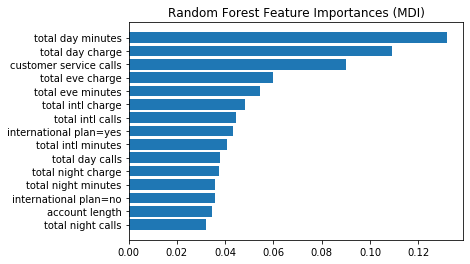

In [10]:
nbr_features = 15

tree_feature_importances = clf.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(feature_names)[sorted_idx])
plt.title("Random Forest Feature Importances (MDI)")
plt.show()

In [11]:
from sklearn.inspection import permutation_importance

In [12]:
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

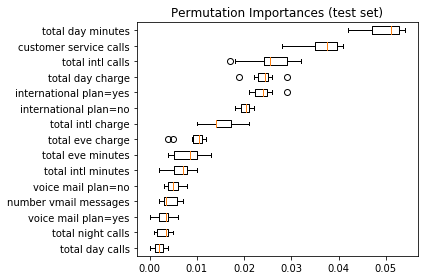

In [13]:
sorted_idx = result.importances_mean.argsort()[-nbr_features:]

fig, ax = plt.subplots()
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(feature_names)[sorted_idx])
plt.title("Permutation Importances (test set)")
plt.tight_layout()
plt.show()

In [14]:
import pydotplus
from sklearn import tree
from IPython.display import Image

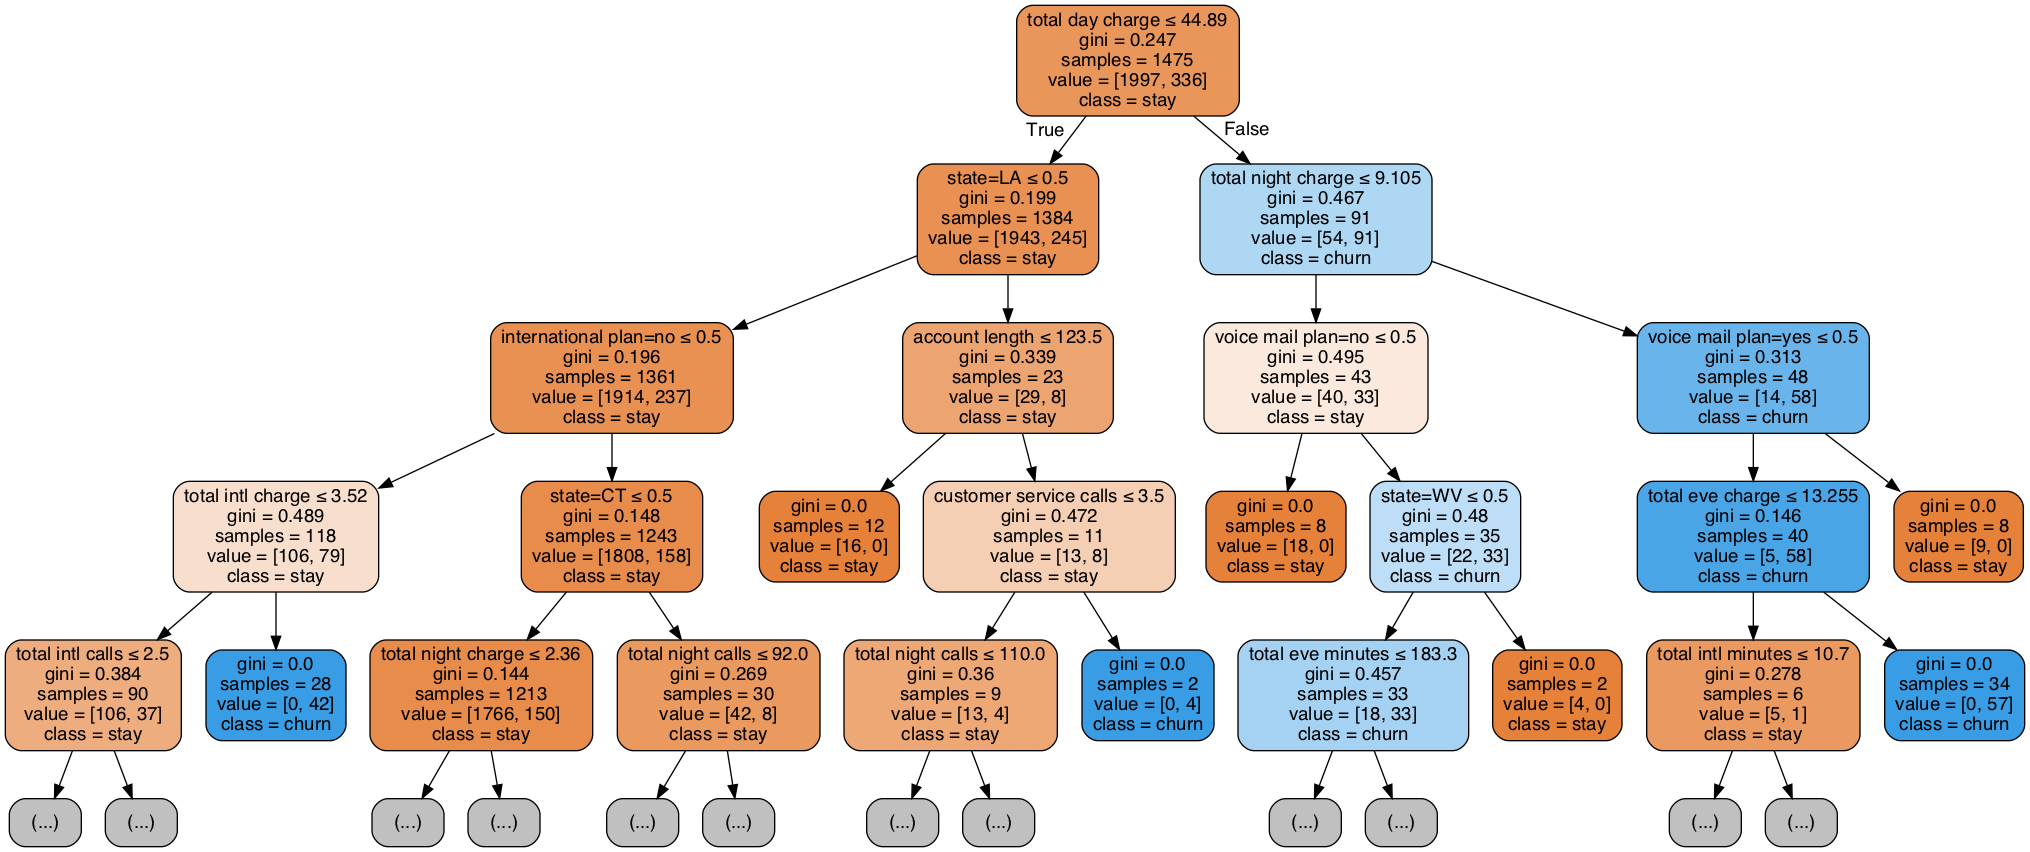

In [15]:
dot_data = tree.export_graphviz(clf.estimators_[0], out_file=None,  
                                feature_names=feature_names, 
                                class_names=['stay', 'churn'],  
                                filled=True, rounded=True,  
                                special_characters=True, max_depth=4)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

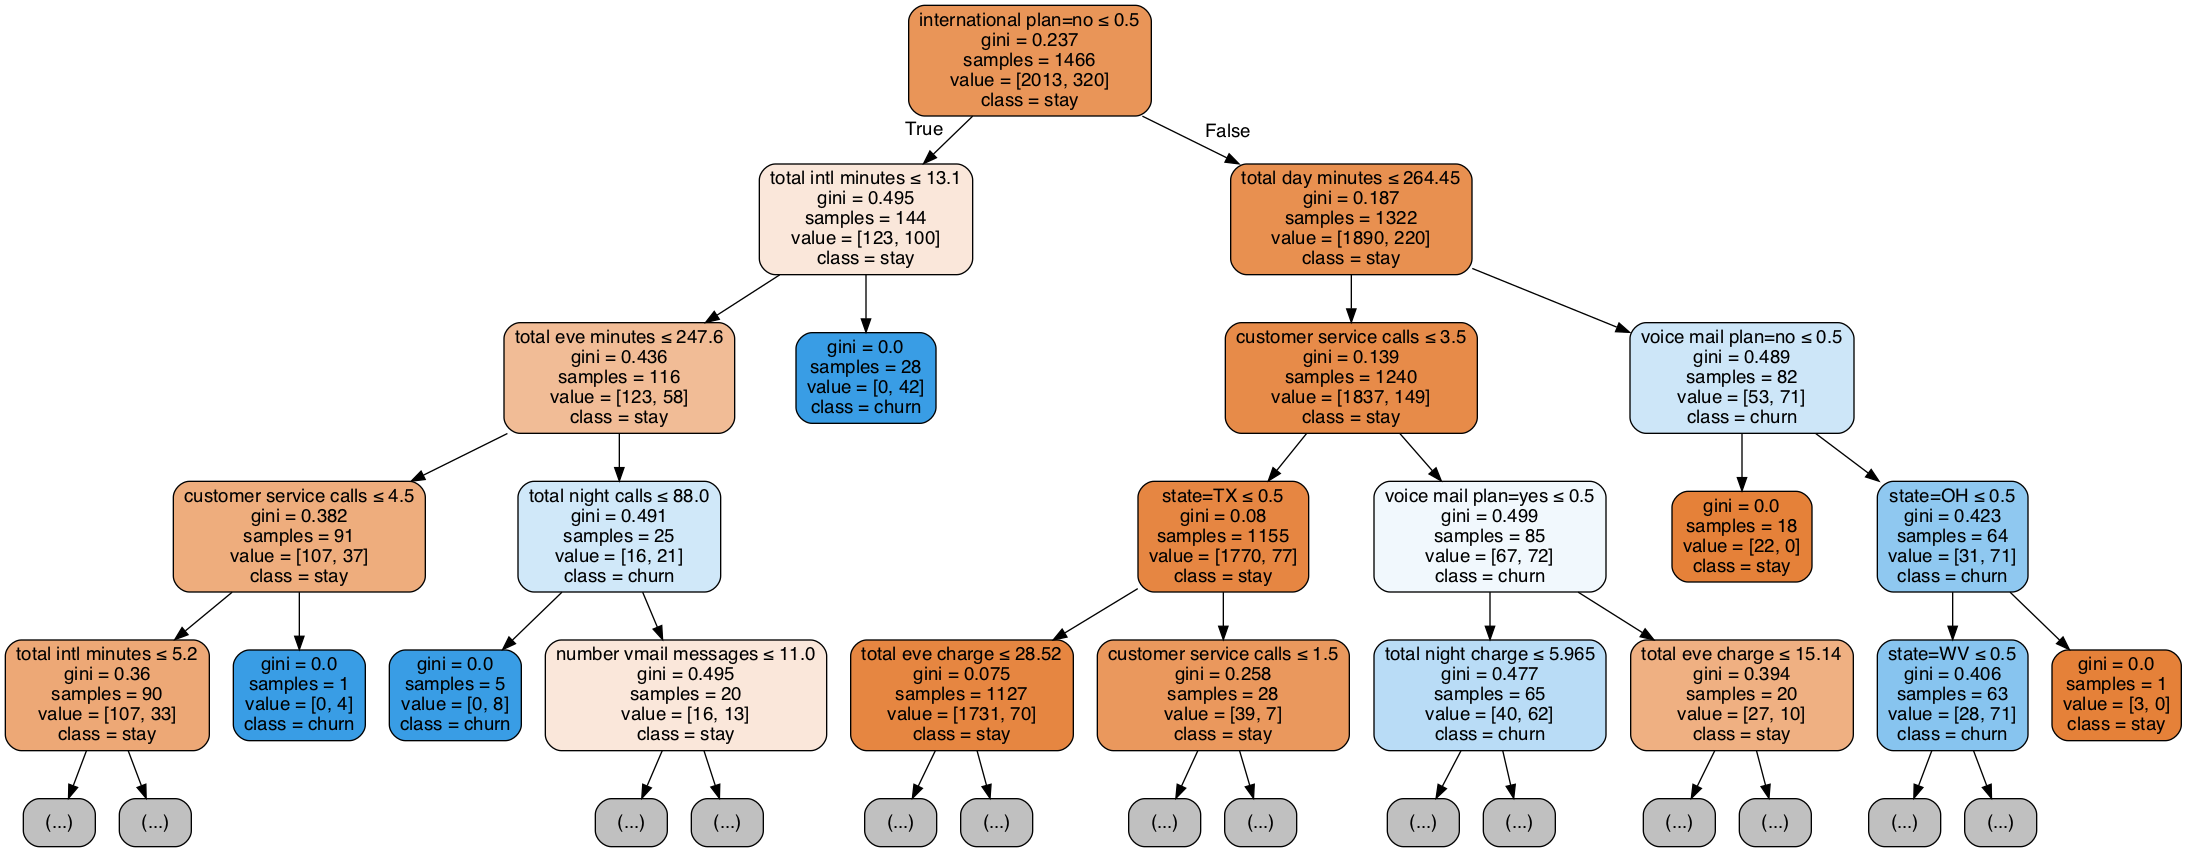

In [16]:
dot_data = tree.export_graphviz(clf.estimators_[1], out_file=None,  
                                feature_names=feature_names, 
                                class_names=['stay', 'churn'],  
                                filled=True, rounded=True,  
                                special_characters=True, max_depth=4)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [27]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=4, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.922
F1-score [0.95627803 0.63888889]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       855
           1       0.97      0.48      0.64       145

    accuracy                           0.92      1000
   macro avg       0.95      0.74      0.80      1000
weighted avg       0.93      0.92      0.91      1000



In [28]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='log2', random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.933
F1-score [0.96216827 0.70742358]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       855
           1       0.96      0.56      0.71       145

    accuracy                           0.93      1000
   macro avg       0.95      0.78      0.83      1000
weighted avg       0.94      0.93      0.93      1000



In [33]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=4, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='log2', random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.857
F1-score [0.92282785 0.02721088]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       855
           1       1.00      0.01      0.03       145

    accuracy                           0.86      1000
   macro avg       0.93      0.51      0.48      1000
weighted avg       0.88      0.86      0.79      1000



### Cross Validation

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
clf = RandomForestClassifier()
scores = cross_val_score(clf, X, y, cv=5)

print('Accuracy %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Accuracy 0.947 +/- 0.005


### Tuning the hyper-parameters

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [37]:
param_list = {'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 5, 10, 20],
             }

grid_search = GridSearchCV(clf, param_grid=param_list, cv=5)
grid_search.fit(X_train, y_train)
clf = grid_search.best_estimator_

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.945
F1-score [0.96869664 0.77366255]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       855
           1       0.96      0.65      0.77       145

    accuracy                           0.94      1000
   macro avg       0.95      0.82      0.87      1000
weighted avg       0.95      0.94      0.94      1000



In [38]:
param_list = {'max_depth': [None] + list(np.arange(2, 20)),
              'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
             }

random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=20, cv=5)
random_search.fit(X_train, y_train)
clf = random_search.best_estimator_


y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.939
F1-score [0.96539989 0.74261603]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       855
           1       0.96      0.61      0.74       145

    accuracy                           0.94      1000
   macro avg       0.95      0.80      0.85      1000
weighted avg       0.94      0.94      0.93      1000



In [39]:
random_search.cv_results_['params'][random_search.cv_results_['rank_test_score'][0]]

{'min_samples_split': 30, 'min_samples_leaf': 30, 'max_depth': 4}

# Bagging

In [40]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

If None, then the base estimator is a decision tree.

In [41]:
clf = BaggingClassifier(base_estimator=None, n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.942
F1-score [0.96670494 0.7751938 ]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       855
           1       0.88      0.69      0.78       145

    accuracy                           0.94      1000
   macro avg       0.92      0.84      0.87      1000
weighted avg       0.94      0.94      0.94      1000



In [42]:
clf = BaggingClassifier(base_estimator=SVC(C=1000), n_estimators=10, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.895
F1-score [0.94169906 0.47236181]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       855
           1       0.87      0.32      0.47       145

    accuracy                           0.90      1000
   macro avg       0.88      0.66      0.71      1000
weighted avg       0.89      0.90      0.87      1000



In [43]:
clf = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=100), n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.94
F1-score [0.96598639 0.74576271]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       855
           1       0.97      0.61      0.75       145

    accuracy                           0.94      1000
   macro avg       0.95      0.80      0.86      1000
weighted avg       0.94      0.94      0.93      1000



# Boosting

In [44]:
from sklearn.ensemble import AdaBoostClassifier

If None, then the base estimator is DecisionTreeClassifier(max_depth=1).

In [45]:
clf = AdaBoostClassifier(base_estimator=None, n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.874
F1-score [0.92857143 0.46610169]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       855
           1       0.60      0.38      0.47       145

    accuracy                           0.87      1000
   macro avg       0.75      0.67      0.70      1000
weighted avg       0.86      0.87      0.86      1000



In [46]:
clf = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100), n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.941
F1-score [0.96649631 0.75313808]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       855
           1       0.96      0.62      0.75       145

    accuracy                           0.94      1000
   macro avg       0.95      0.81      0.86      1000
weighted avg       0.94      0.94      0.94      1000

